In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

C:\Users\tomia\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
california_housing_dataframe = pd.read_csv("california_housing_train.csv", sep=",")
california_housing_dataframe = california_housing_dataframe.reindex(np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7603,-118.37,34.14,23.0,1883.0,512.0,774.0,478.0,3.5096,396.400
8574,-118.51,34.03,37.0,4072.0,905.0,1468.0,923.0,3.8571,500.001
5202,-118.13,33.82,36.0,665.0,114.0,273.0,112.0,3.7321,223.700
10566,-120.45,34.96,21.0,2121.0,445.0,2211.0,463.0,4.0603,117.600
14532,-122.15,37.71,36.0,998.0,178.0,531.0,183.0,4.0208,191.500
5187,-118.13,33.88,32.0,3088.0,1024.0,1981.0,956.0,2.2027,192.700
2836,-117.73,34.10,37.0,3457.0,544.0,1344.0,530.0,5.8891,226.000
668,-117.04,32.67,14.0,3464.0,683.0,2139.0,734.0,4.0668,137.500
4964,-118.11,34.06,16.0,2416.0,565.0,1750.0,514.0,2.8229,163.700
7157,-118.32,33.75,37.0,1080.0,135.0,366.0,142.0,11.6677,500.001


In [11]:
# Define the input feature: total_rooms.
my_feature = california_housing_dataframe[["total_rooms"]]

# Configure a numeric feature column for total_rooms.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

In [12]:
features = {key:np.array(value) for key,value in dict(my_feature).items()} 

In [8]:
for i in features:
    print(i)

total_rooms


In [9]:
type(features)

dict

In [10]:
for i in features.keys():
    print(i)

total_rooms


In [11]:
features['total_rooms'][1]

7650.0

In [2]:
import csv
import matplotlib.pyplot as plt

def makeGraph(file,endCol,startCol=0):  
    for col in range(startCol,endCol): #from the start col values in the dataset 9 catagories + 1 extra for the loop termination
        values = []
        fileName = file
        # Fixing random state for reproducibility
        with open(fileName+'.csv', 'r', newline='') as csvfile:
            askreader = csv.reader(csvfile, delimiter=',', lineterminator='\n')

            for rows in askreader:
                values.append(rows[col]) # from cols 11-20 are the values from the API

        title = values[0]
        print(title)
        values = [float(i) for i in values[1:]] #converting values from string to floats for the chart

        #bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] #bins to sort numbers into based on values they fall between

        # the histogram of the data
        plt.hist(values,rwidth=0.6)
        plt.xlabel('Values')
        plt.ylabel('Count')
        plt.title('{} Distribution of {}'.format(fileName, title))
        plt.grid(True)
        plt.show()
        plt.clf() #clear the current graph, can be removed to see all values on one chart
        print("Done")

    
     

longitude


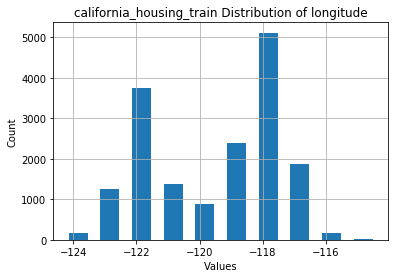

Done
latitude


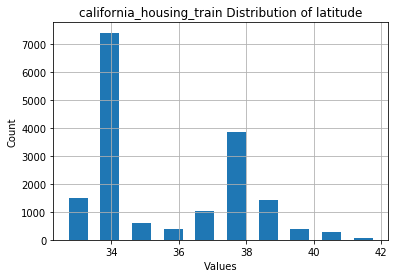

Done
housing_median_age


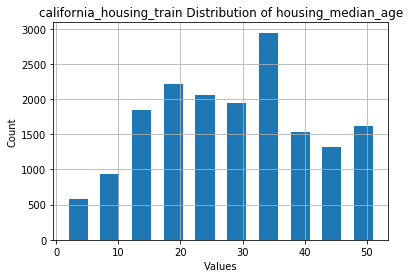

Done
total_rooms


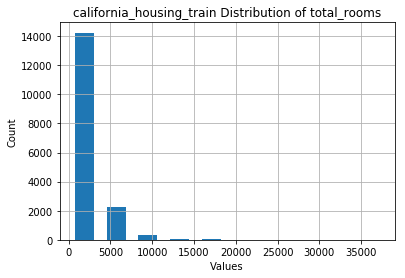

Done
total_bedrooms


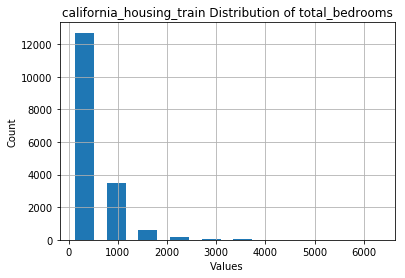

Done
population


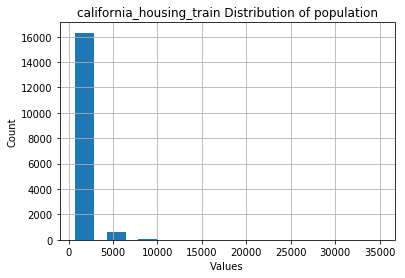

Done
households


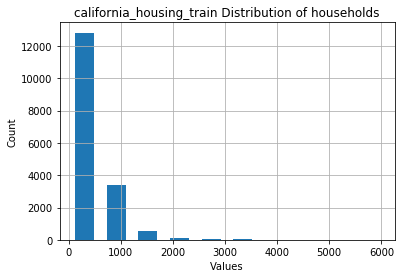

Done
median_income


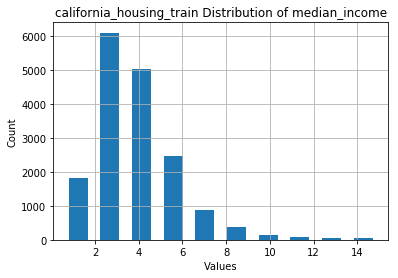

Done
median_house_value


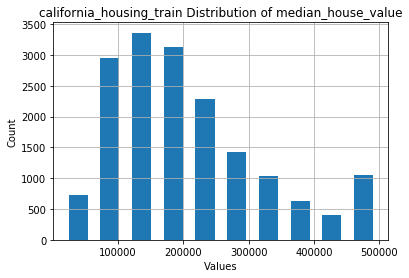

Done


<Figure size 432x288 with 0 Axes>

In [5]:
makeGraph('california_housing_train',9)

In [13]:
targets = california_housing_dataframe["median_house_value"]

In [14]:
ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit

In [22]:
ds.list_files('*')

<ShuffleDataset shapes: (), types: tf.string>

In [106]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)

iterator = batched_dataset.make_one_shot_iterator()
next_element = iterator.get_next()

ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
ds = ds.batch(1).repeat(None)
#ds = ds.shuffle(buffer_size=10000)
iteratorDS = ds.make_one_shot_iterator()
next_elementDS = iteratorDS.get_next()


with tf.Session() as sess:
    print(sess.run(next_element))  # ==> ([0, 1, 2,   3],   [ 0, -1,  -2,  -3])
    print(sess.run(next_element))  # ==> ([4, 5, 6,   7],   [-4, -5,  -6,  -7])
    print(sess.run(next_element))  # ==> ([8, 9, 10, 11],   [-8, -9, -10, -11])
    print(sess.run(next_elementDS))  # ==> ([totalrooms (variable)],   [ Median house value(target)])
    print(sess.run(next_elementDS))  # ==> ([4, 5, 6,   7],   [-4, -5,  -6,  -7])
    print(sess.run(next_elementDS))  # ==> ([8, 9, 10, 11],   [-8, -9, -10, -11])

(array([0, 1, 2, 3]), array([ 0, -1, -2, -3]))
(array([4, 5, 6, 7]), array([-4, -5, -6, -7]))
(array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11]))
({'total_rooms': array([5612.])}, array([66.9]))
({'total_rooms': array([7650.])}, array([80.1]))
({'total_rooms': array([720.])}, array([85.7]))


In [108]:
type(features)

dict

In [107]:
type(targets)

pandas.core.series.Series

In [61]:
bc = {key:np.array(value) for key,value in dict(my_feature).items()} 

In [82]:
mf = dict(my_feature)
mfi = dict(my_feature.items())

In [116]:
print('type mf: {}'.format(type(mf)))
print('type mfi: {}'.format(type(mfi)))
print("-------------------------------")
print('keys mf: {}'.format(mf.keys()))
print('keys mfi: {}'.format(mfi.keys()))
print("-------------------------------")
print('index[0] mf: {}'.format(mf['total_rooms'][0]))
print('index[0] mfi: {}'.format(mfi['total_rooms'][0]))
print("-------------------------------")
bc['total_rooms'][0]

type mf: <class 'dict'>
type mfi: <class 'dict'>
-------------------------------
keys mf: dict_keys(['total_rooms'])
keys mfi: dict_keys(['total_rooms'])
-------------------------------
index[0] mf: 3994.0
index[0] mfi: 3994.0
-------------------------------


5612.0

In [91]:
print({'hello':0,'bye':1,'tomi':3}.keys())

dict_keys(['hello', 'bye', 'tomi'])


In [109]:
td = dict(targets)

In [113]:
td[1]

111.6

In [2]:
a = (1,2)

In [3]:
a

(1, 2)

In [4]:
a[0]

1